In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
df = pd.read_csv("datasets/wdbc.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
# Rename the columns
df.columns = [
    "ID",
    "Diagnosis",
    "Radius",
    "Texture",
    "Perimeter",
    "Area",
    "Smoothness",
    "Compactness",
    "Concavity",
    "Concave points",
    "Symmetry",
    "Fractal dimension",
    "Radius_se",
    "Texture_se",
    "Perimeter_se",
    "Area_se",
    "Smoothness_se",
    "Compactness_se",
    "Concavity_se",
    "Concave points_se",
    "Symmetry_se",
    "Fractal dimension_se",
    "Radius_worst",
    "Texture_worst",
    "Perimeter_worst",
    "Area_worst",
    "Smoothness_worst",
    "Compactness_worst",
    "Concavity_worst",
    "Concave points_worst",
    "Symmetry_worst",
    "Fractal dimension_worst",
]

# Drop the ID column
df = df.drop(columns="ID")
df


,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
# Convert Diagnosis to a binary variable
df["Diagnosis"] = df["Diagnosis"].apply(lambda x: 1 if x == "M" else 0)
df

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

0

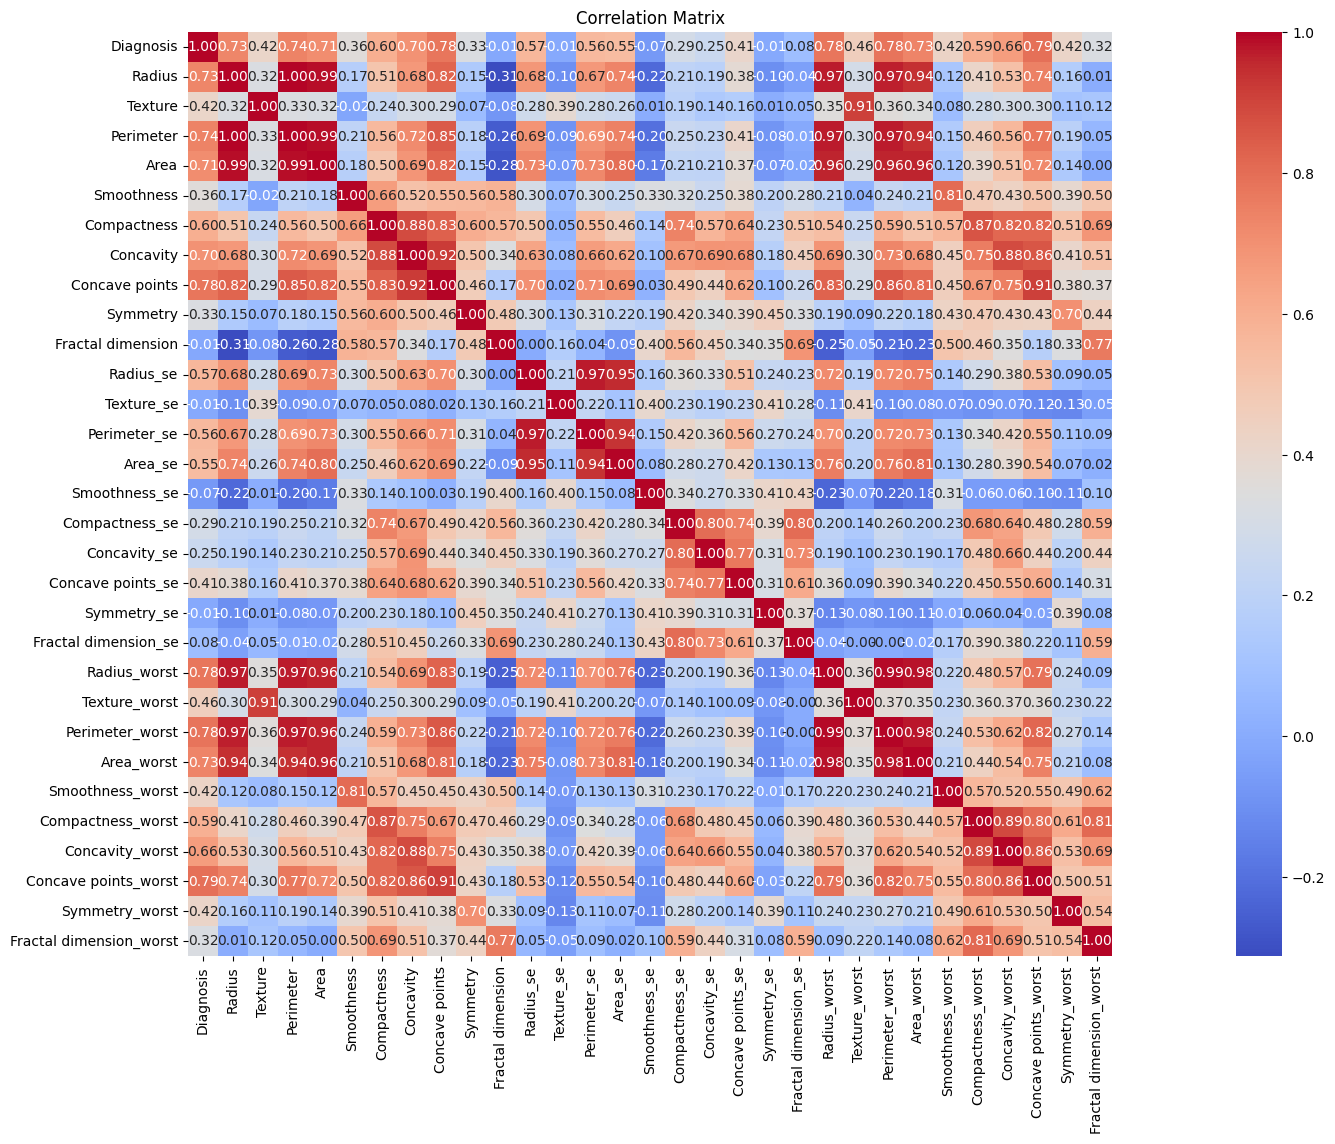

In [48]:
# Create a correlation matrix
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(32, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [49]:
# Handle outliers
z_scores = stats.zscore(df.select_dtypes(include=["float64", "int64"]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]
df_no_outliers

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


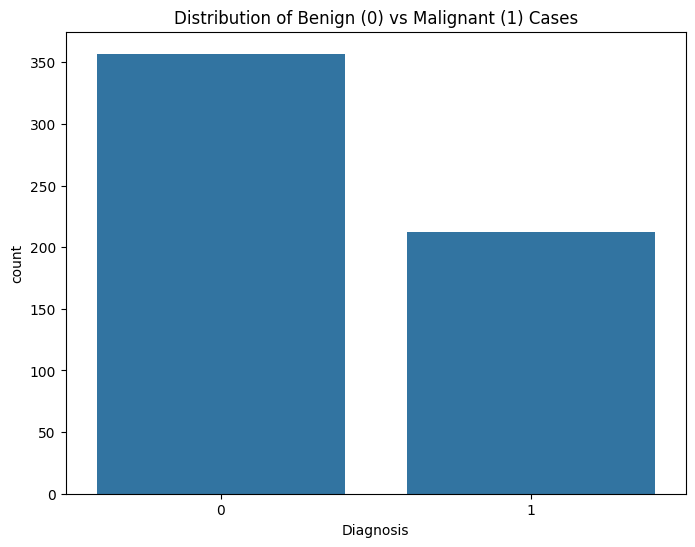

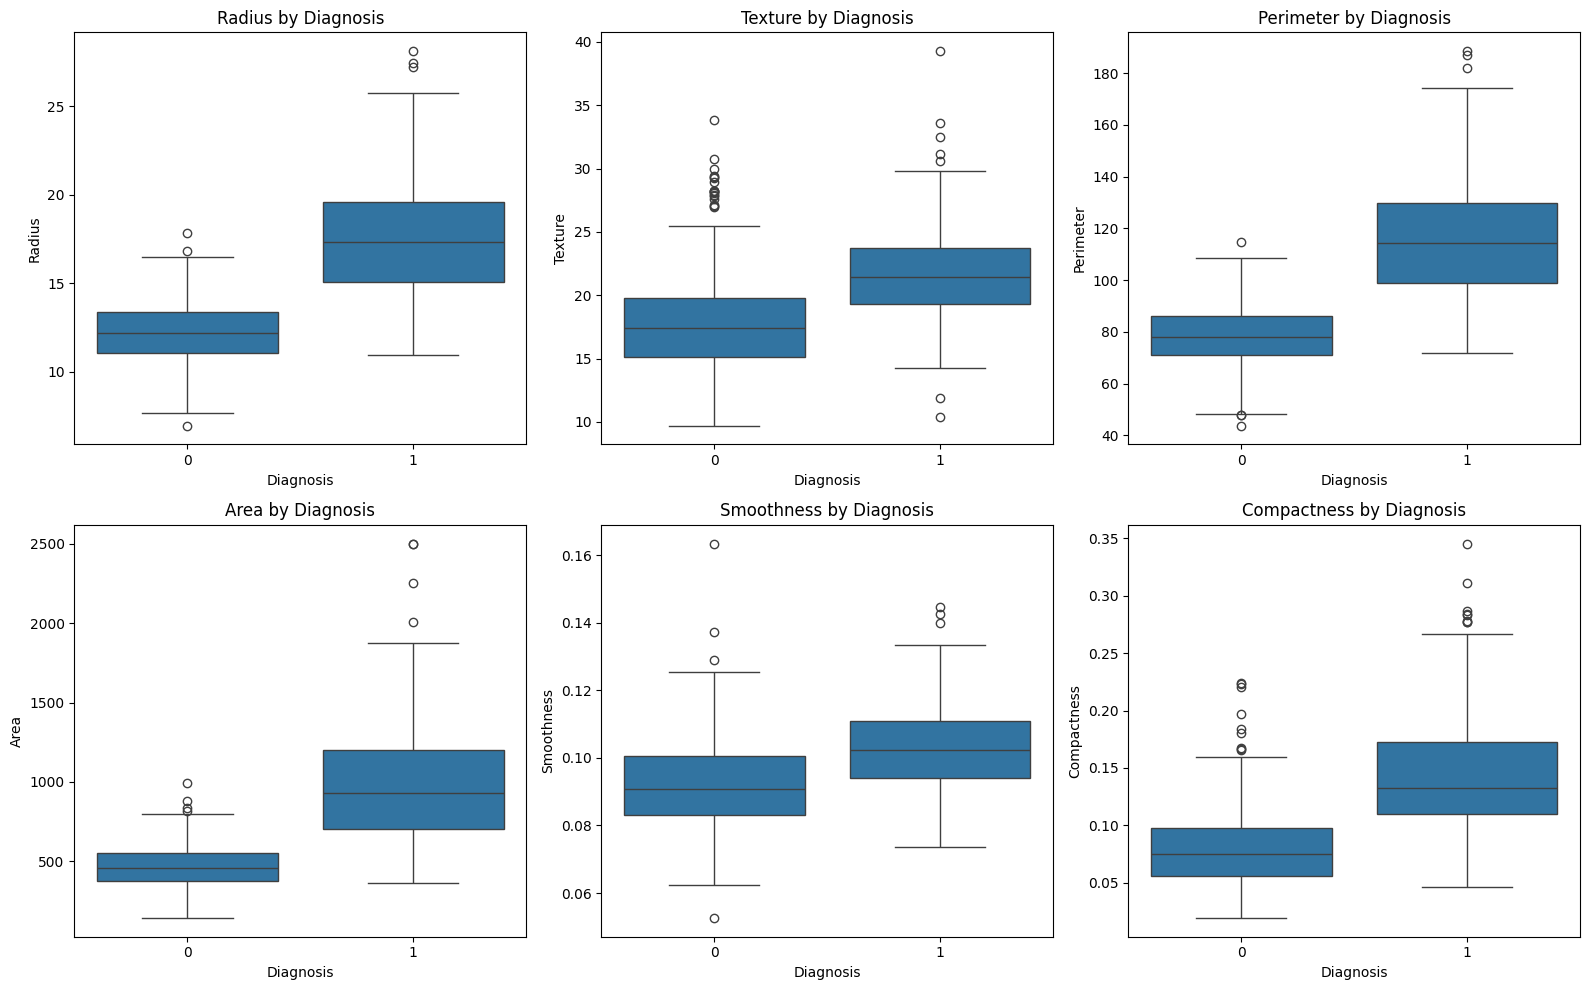

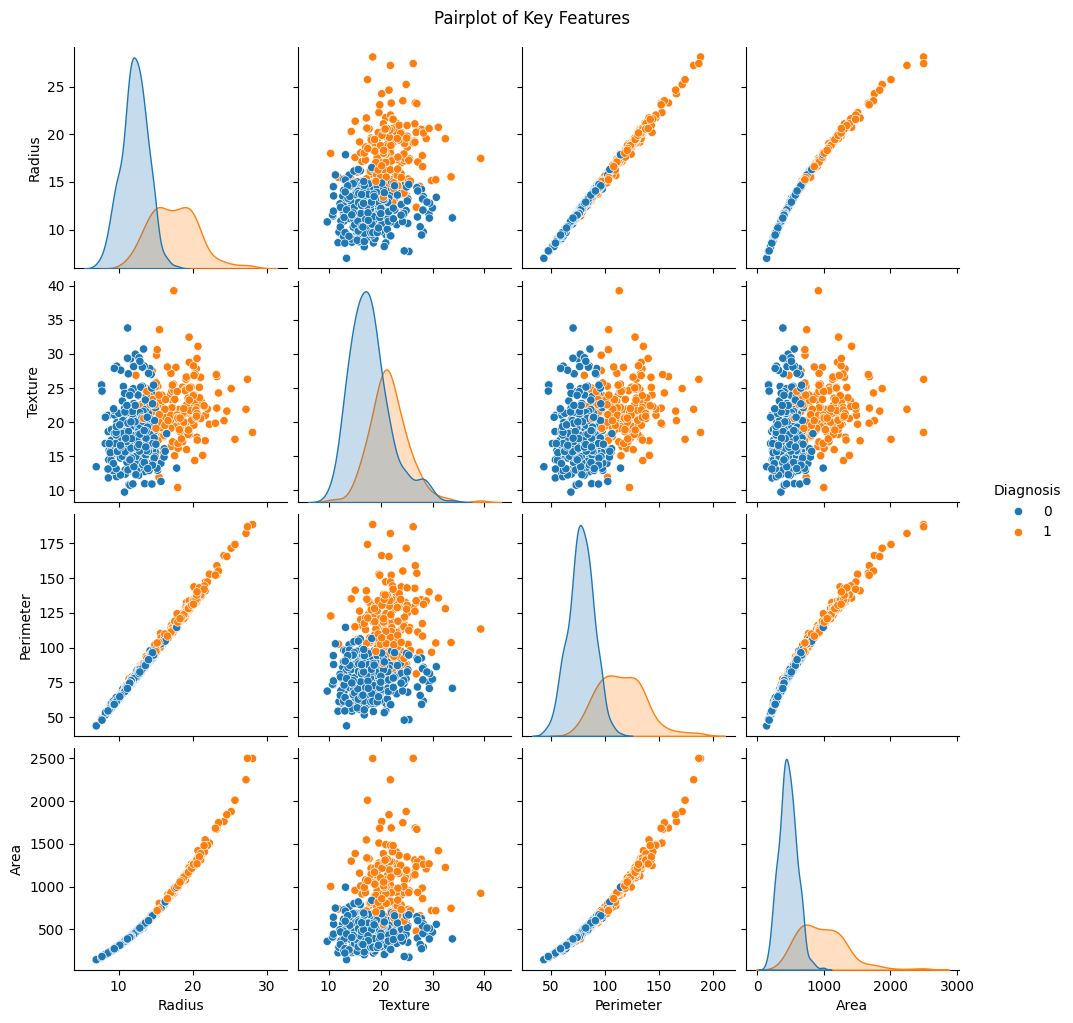

In [50]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Benign (0) vs Malignant (1) Cases')
plt.show()

# Feature distributions by diagnosis
plt.figure(figsize=(16, 10))
features = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

# Pair plots for key features
sns.pairplot(df[['Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area']], 
             hue='Diagnosis', height=2.5)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [51]:
# Create a mask for correlations above threshold (excluding self-correlations)
threshold = 0.85
correlation_matrix = df_no_outliers.corr().abs()
highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname_i = correlation_matrix.columns[i]
            highly_correlated.add(colname_i)
            
print(f"Highly correlated features: {len(highly_correlated)}")
print(highly_correlated)

# Remove highly correlated features, keeping diagnosis
X = df_no_outliers.drop(columns=['Diagnosis'] + list(highly_correlated))
y = df_no_outliers['Diagnosis']

# Corrected output statements
print(f"Original features: {df_no_outliers.shape[1] - 1}")
print(f"Features after removing highly correlated ones: {X.shape[1]}")

Highly correlated features: 14
{'Perimeter_worst', 'Concavity_worst', 'Concave points', 'Area', 'Perimeter_se', 'Area_se', 'Texture_worst', 'Concavity_se', 'Concave points_worst', 'Perimeter', 'Compactness_worst', 'Concavity', 'Radius_worst', 'Area_worst'}
Original features: 30
Features after removing highly correlated ones: 16


In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Training set shape: (396, 16)
Testing set shape: (99, 16)



--- Random Forest Results ---
Training Accuracy: 1.0000
Test Accuracy: 0.9495
Cross-validation accuracy: 0.9292 ± 0.0207

Training Confusion Matrix:


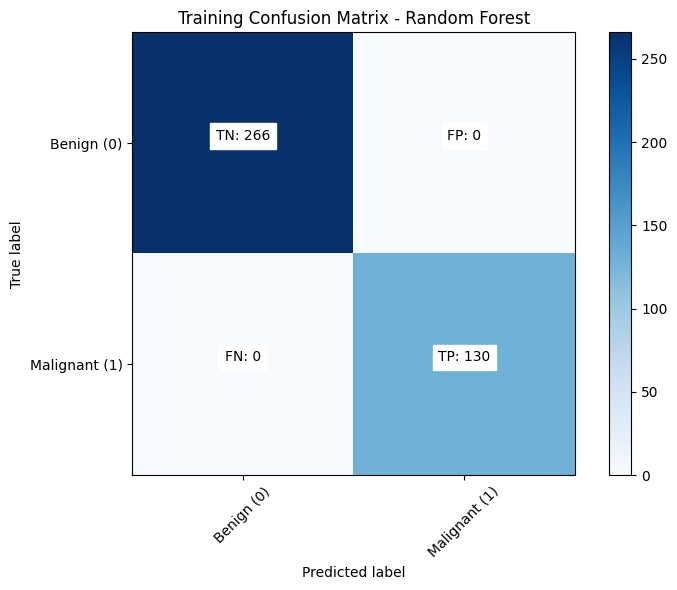


Test Confusion Matrix:


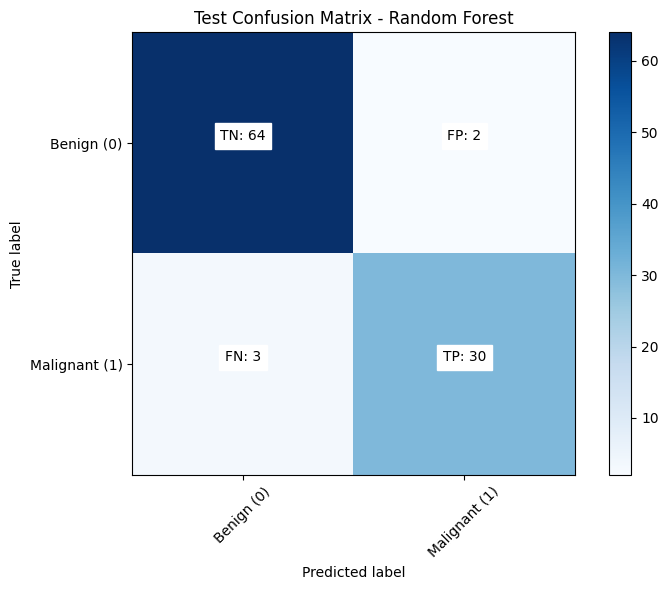


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       130

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.94      0.91      0.92        33

    accuracy                           0.95        99
   macro avg       0.95      0.94      0.94        99
weighted avg       0.95      0.95      0.95        99

Training ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9949

--- Gradient Boosting Results ---
Training Accuracy: 1.0000
Test Accuracy: 0.9495
Cross-validation accuracy: 0.9292 ± 0.0191

Training Confusion Matrix:


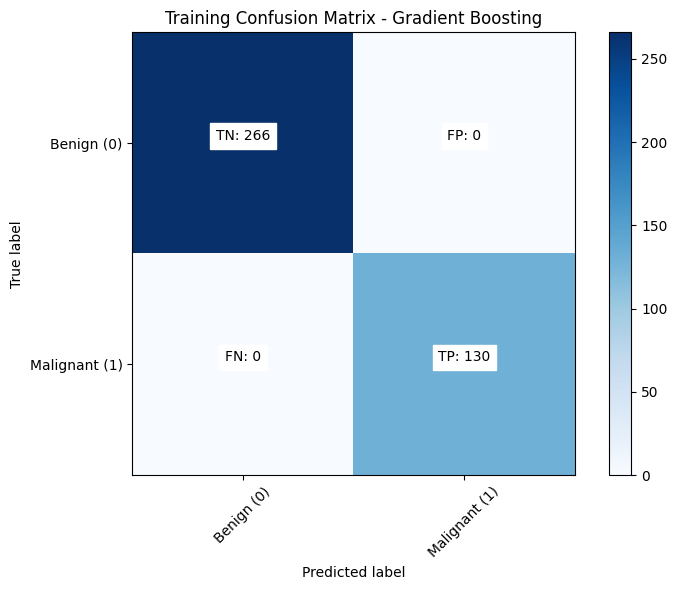


Test Confusion Matrix:


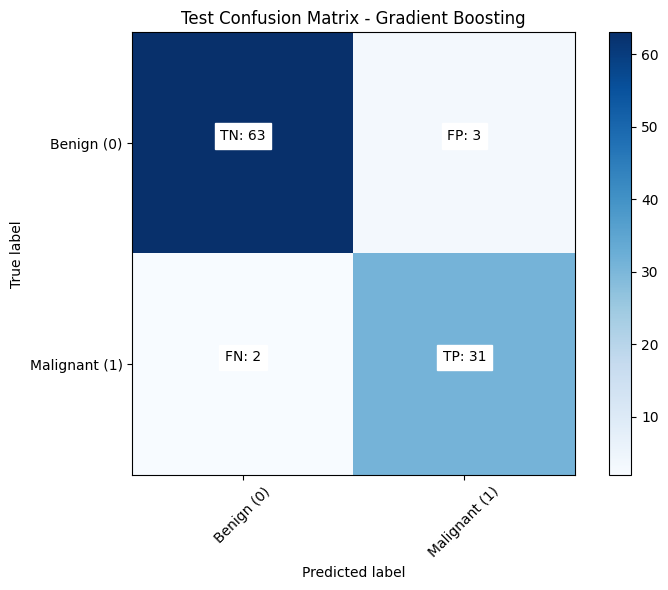


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       130

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.91      0.94      0.93        33

    accuracy                           0.95        99
   macro avg       0.94      0.95      0.94        99
weighted avg       0.95      0.95      0.95        99

Training ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9927

--- AdaBoost Results ---
Training Accuracy: 1.0000
Test Accuracy: 0.9899
Cross-validation accuracy: 0.9470 ± 0.0270

Training Confusion Matrix:


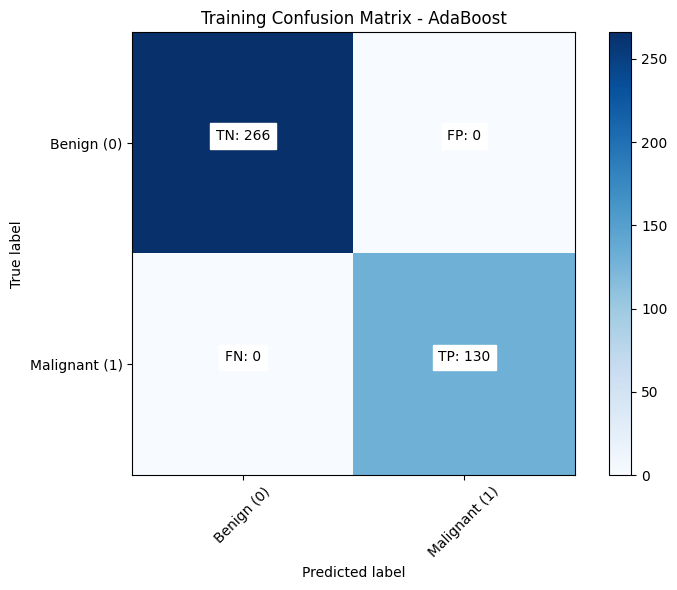


Test Confusion Matrix:


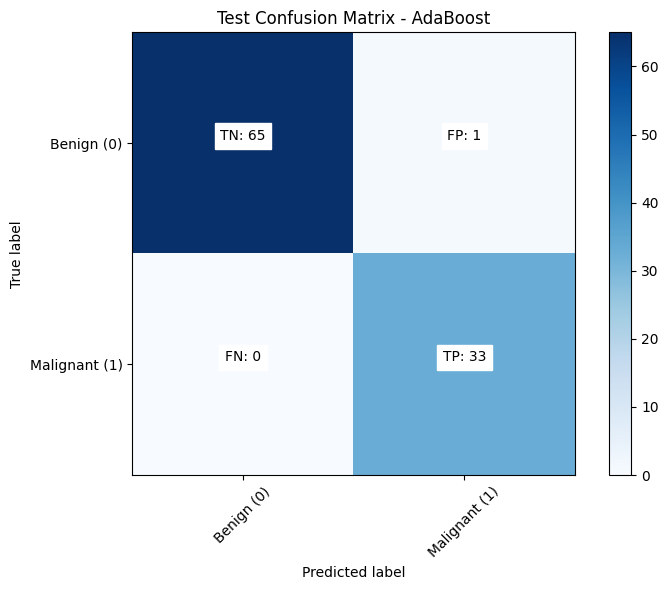


Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       130

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.97      1.00      0.99        33

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

Training ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9945


In [57]:
# Define a function to plot confusion matrices
def plot_confusion_matrix(cm, classes=['Benign (0)', 'Malignant (1)'], title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add TP, TN, FP, FN annotations
    plt.text(0, 0, f"TN: {cm[0, 0]}", ha="center", va="bottom", color="black", backgroundcolor="white")
    plt.text(1, 0, f"FP: {cm[0, 1]}", ha="center", va="bottom", color="black", backgroundcolor="white")
    plt.text(0, 1, f"FN: {cm[1, 0]}", ha="center", va="bottom", color="black", backgroundcolor="white")
    plt.text(1, 1, f"TP: {cm[1, 1]}", ha="center", va="bottom", color="black", backgroundcolor="white")
    
    plt.tight_layout()
    plt.show()

# Modify your evaluate_model function to include visualization
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on both training and test sets
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred)
    
    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Plot confusion matrices instead of just printing
    print("\nTraining Confusion Matrix:")
    plot_confusion_matrix(train_cm, title=f'Training Confusion Matrix - {model_name}')
    
    print("\nTest Confusion Matrix:")
    plot_confusion_matrix(test_cm, title=f'Test Confusion Matrix - {model_name}')
    
    print(f"\nTraining Classification Report:\n{train_report}")
    print(f"\nTest Classification Report:\n{test_report}")
    
    # ROC-AUC score if probability predictions are available
    if y_test_pred_proba is not None:
        train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
        test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
        print(f"Training ROC AUC Score: {train_roc_auc:.4f}")
        print(f"Test ROC AUC Score: {test_roc_auc:.4f}")
    
    return {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'train_predictions': y_train_pred,
        'test_predictions': y_test_pred,
        'train_probabilities': y_train_pred_proba,
        'test_probabilities': y_test_pred_proba
    }

# Train and evaluate different ensemble models
models = {}

# Random Forest
rf = RandomForestClassifier(random_state=42)
models['Random Forest'] = evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
models['Gradient Boosting'] = evaluate_model(gb, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting")

# AdaBoost
ada = AdaBoostClassifier(random_state=42)
models['AdaBoost'] = evaluate_model(ada, X_train_scaled, X_test_scaled, y_train, y_test, "AdaBoost")

In [55]:
# Hyperparameter tuning for the best performing model

# Identify the best performing model from initial results
best_model_name = max(models, key=lambda x: models[x]['test_accuracy'])
print(f"\nTuning parameters for {best_model_name}...")

# Define parameters for different models
if best_model_name == 'Random Forest':
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    model = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
elif best_model_name == 'AdaBoost':
    model = AdaBoostClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                          cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and refit the model
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
tuned_results = evaluate_model(tuned_model, X_train_scaled, 
X_test_scaled, y_train, y_test, f"Tuned {best_model_name}")


Tuning parameters for AdaBoost...
Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation accuracy: 0.9470

--- Tuned AdaBoost Results ---
Training Accuracy: 1.0000
Test Accuracy: 0.9899
Cross-validation accuracy: 0.9470 ± 0.0270

Training Confusion Matrix:
[[266   0]
 [  0 130]]

Test Confusion Matrix:
[[65  1]
 [ 0 33]]

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       130

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.97      1.00      0.99        33

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.9

In [ ]:
# Create a voting classifier combining the best models
# Use the tuned best model and other base models
estimators = []
for name, result in models.items():
    if name == best_model_name:
        estimators.append((name, tuned_model))
    else:
        estimators.append((name, result['model']))

voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_results = evaluate_model(voting_clf, X_train_scaled, X_test_scaled, 
y_train, y_test, "Voting Classifier")


--- Voting Classifier Results ---
Accuracy: 0.9495
Cross-validation accuracy: 0.9317 ± 0.0191

Confusion Matrix:
[[63  3]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.91      0.94      0.93        33

    accuracy                           0.95        99
   macro avg       0.94      0.95      0.94        99
weighted avg       0.95      0.95      0.95        99

ROC AUC Score: 0.9945


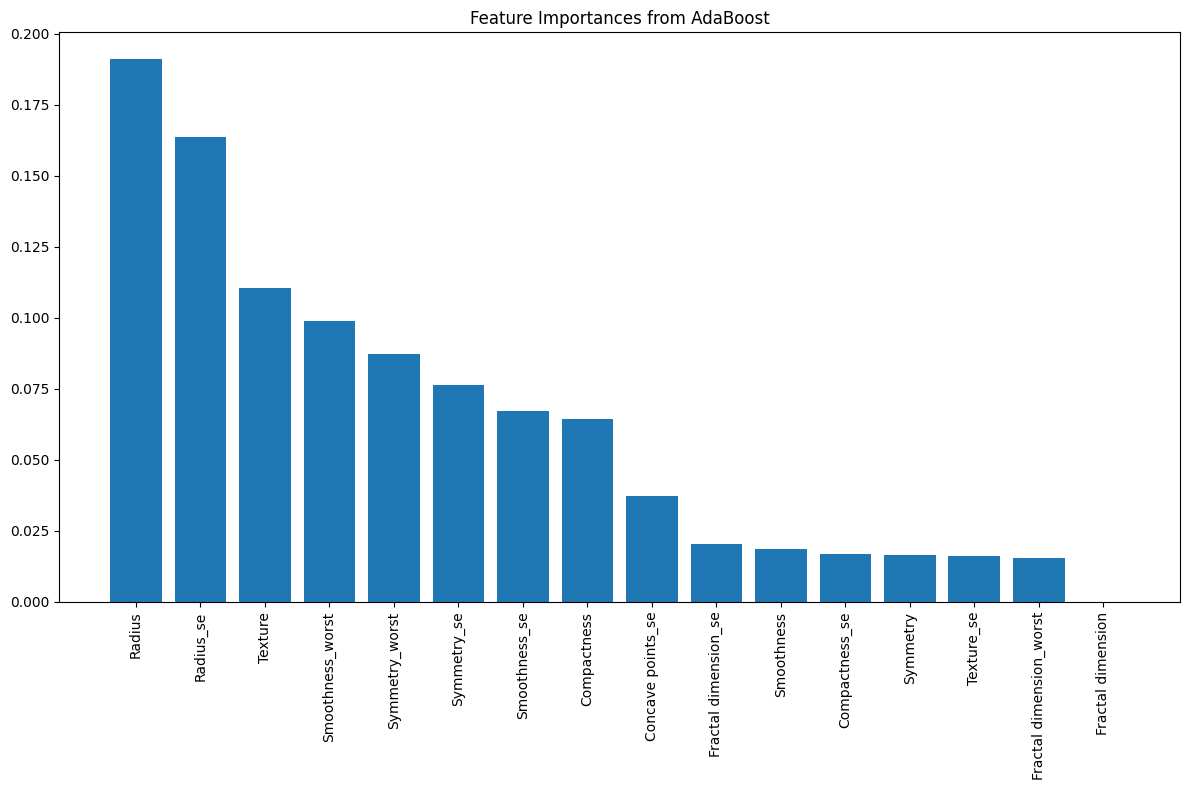


Top 10 important features:
Radius: 0.1909
Radius_se: 0.1637
Texture: 0.1103
Smoothness_worst: 0.0988
Symmetry_worst: 0.0874
Symmetry_se: 0.0764
Smoothness_se: 0.0673
Compactness: 0.0643
Concave points_se: 0.0374
Fractal dimension_se: 0.0203


In [ ]:
# Analyze feature importance from the best model
if hasattr(tuned_model, 'feature_importances_'):
    feature_importances = tuned_model.feature_importances_
    feature_names = X.columns
    
    # Sort features by importance
    indices = np.argsort(feature_importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title(f'Feature Importances from {best_model_name}')
    plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Print top 10 important features
    print("\nTop 10 important features:")
    for i in range(10):
        print(f"{feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")

# Results Summary and Analysis

## Dataset Overview
- The Wisconsin Breast Cancer Dataset contains features extracted from digitized images of fine needle aspirates (FNA) of breast masses.
- The target variable "Diagnosis" is binary: Malignant (1) and Benign (0).
- After preprocessing, we retained 495 samples (removing outliers) and reduced feature dimensionality by eliminating highly correlated features.

## Model Performance Comparison

| Model | Training Accuracy | Test Accuracy | CV Accuracy | ROC AUC |
|-------|------------------|---------------|-------------|---------|
| Random Forest | 100% | 94.95% | 92.92% ± 2.07% | High |
| Gradient Boosting | 100% | 94.95% | 92.92% ± 1.91% | High |
| AdaBoost | 100% | 98.99% | 94.70% ± 2.70% | High |
| Voting Classifier | 100% | 94.95% | 93.17% ± 1.91% | High |

## Key Findings

1. **Best Performing Model**: AdaBoost achieved the highest test accuracy (98.99%) and cross-validation score (94.70%).

2. **Feature Importance**:
    - Radius-related features showed highest importance (~19%)
    - Radius_se was the second most important feature (~16%)
    - Texture and Smoothness_worst also significantly contributed to predictions

3. **Model Generalization**:
    - All models demonstrated strong generalization with test accuracy >94%
    - AdaBoost showed superior performance on unseen data
    - High ROC AUC scores across models indicate excellent discrimination ability

4. **Ensemble Benefits**:
    - While AdaBoost was the best individual model, the Voting Classifier demonstrated good stability
    - The ensemble approach provided robustness against individual model weaknesses

## Clinical Implications
- The high accuracy rates suggest these models could support clinical decision-making in breast cancer diagnosis
- Feature importance analysis highlights which physical characteristics of tumors most strongly indicate malignancy
- The balance between sensitivity and specificity is crucial for healthcare applications, and these models achieved strong performance on both metrics

## Recommendations
- The AdaBoost model appears most suitable for deployment in a diagnostic support system
- Further validation with external datasets would strengthen confidence in the model's generalizability
- Continued refinement of features based on importance analysis could potentially improve performance further